<a href="https://colab.research.google.com/github/UsmanSharif001/EcoTrio/blob/main/EcoTrioAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""train-yolov11-object-detection.ipynb
# How to Train YOLOv11 on a Custom Dataset
---
Built with Ultralytics YOLOv11, released October 2024.
"""

# Check GPU availability
!nvidia-smi

Thu Mar 20 12:07:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Set Home Directory
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Install Ultralytics (YOLOv11)
!pip install -q ultralytics roboflow supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3

In [ ]:
# Download Dataset from Roboflow
import roboflow
roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("ml-mandatory-1").project("ecotrioai")
version = project.version(1)
dataset = version.download("yolov8")  # YOLOv11 uses YOLOv8 format

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to EcoTrioAi-1 in yolov8:: 100%|██████████| 1170/1170 [00:00<00:00, 3467.30it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Train YOLOv11
from ultralytics import YOLO
model = YOLO("yolo11m.pt")  # Medium model; adjust to yolov11n.pt, yolov11s.pt, etc.
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
    patience=15  # Early stopping if no improvement
)

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/EcoTrioAi-1/data.yaml, epochs=50, time=None, patience=15, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/EcoTrioAi-1/train/labels.cache... 534 images, 0 backgrounds, 0 corrupt: 100%|██████████| 534/534 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/EcoTrioAi-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.41G      1.436      2.446       1.84         16        640: 100%|██████████| 67/67 [00:21<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         23         33      0.176      0.403      0.135     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.41G      1.761      2.286      2.048         17        640: 100%|██████████| 67/67 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         23         33     0.0585      0.423     0.0463     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.47G      1.844      2.384      2.165         12        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         23         33      0.351      0.133     0.0457     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.54G      1.834      2.374      2.119         23        640: 100%|██████████| 67/67 [00:20<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         23         33     0.0712       0.21     0.0361    0.00846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.59G      1.834      2.403      2.128         25        640: 100%|██████████| 67/67 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         23         33      0.108      0.444      0.115     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.59G      1.754      2.255      2.058         24        640: 100%|██████████| 67/67 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         23         33      0.284      0.442      0.231      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.59G      1.684      2.058      1.997         31        640: 100%|██████████| 67/67 [00:19<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         23         33      0.327      0.436      0.277      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.59G      1.703      2.028      1.999         16        640: 100%|██████████| 67/67 [00:20<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         23         33      0.441      0.604      0.512      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.6G      1.647      2.004       1.95         21        640: 100%|██████████| 67/67 [00:19<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         23         33      0.587      0.454      0.557      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.71G      1.579      1.931      1.917         12        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         23         33      0.562      0.505      0.512      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.71G      1.543       1.87      1.917         17        640: 100%|██████████| 67/67 [00:20<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         23         33      0.653      0.522      0.612      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.71G      1.532      1.858        1.9         25        640: 100%|██████████| 67/67 [00:20<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         23         33       0.66      0.401      0.555      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.71G       1.53      1.811      1.866         29        640: 100%|██████████| 67/67 [00:19<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         23         33      0.694      0.436       0.59      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.71G      1.484      1.733       1.82         19        640: 100%|██████████| 67/67 [00:19<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         23         33      0.739      0.671      0.702      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.71G      1.528      1.753       1.86         15        640: 100%|██████████| 67/67 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         23         33      0.618      0.543      0.609      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.71G       1.42      1.634      1.782         20        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         23         33      0.693      0.592      0.705      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.71G      1.461      1.653      1.783         13        640: 100%|██████████| 67/67 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         23         33      0.587      0.756       0.74      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.71G      1.433      1.627      1.793         19        640: 100%|██████████| 67/67 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         23         33      0.539      0.605      0.664      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.71G      1.376      1.588      1.729         16        640: 100%|██████████| 67/67 [00:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         23         33      0.609      0.687      0.704      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.76G      1.375      1.525      1.727         15        640: 100%|██████████| 67/67 [00:20<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         23         33      0.606      0.564      0.648      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.87G      1.396      1.581      1.726         21        640: 100%|██████████| 67/67 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         23         33      0.611      0.664      0.696      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.98G      1.377      1.563      1.723         18        640: 100%|██████████| 67/67 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         23         33      0.723      0.705      0.765      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       5.1G      1.335      1.455      1.699         19        640: 100%|██████████| 67/67 [00:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         23         33      0.773      0.682      0.698      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.1G      1.321      1.454       1.69         25        640: 100%|██████████| 67/67 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         23         33      0.724      0.739      0.784      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       5.1G      1.338      1.403       1.69         23        640: 100%|██████████| 67/67 [00:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         23         33      0.908      0.572      0.788      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.1G      1.285      1.377      1.687         17        640: 100%|██████████| 67/67 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         23         33      0.878      0.695      0.771      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.1G      1.277      1.379       1.66         25        640: 100%|██████████| 67/67 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         23         33      0.867       0.64      0.802      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.1G      1.265      1.374      1.656         20        640: 100%|██████████| 67/67 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         23         33       0.67      0.698      0.776      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       5.1G      1.216       1.26      1.607         18        640: 100%|██████████| 67/67 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         23         33      0.948      0.635      0.828      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       5.1G      1.218      1.288      1.604         17        640: 100%|██████████| 67/67 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         23         33      0.933       0.63      0.839      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       5.1G      1.189      1.257      1.591         20        640: 100%|██████████| 67/67 [00:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         23         33      0.822      0.744      0.824      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.11G      1.164      1.184      1.593         16        640: 100%|██████████| 67/67 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         23         33      0.756      0.739      0.783      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.22G      1.186      1.211      1.594         12        640: 100%|██████████| 67/67 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         23         33      0.878       0.59      0.804      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.22G      1.151      1.161      1.551         26        640: 100%|██████████| 67/67 [00:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         23         33      0.795      0.593      0.769      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.22G      1.164      1.231      1.584         22        640: 100%|██████████| 67/67 [00:20<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         23         33      0.751      0.615      0.703      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.22G      1.169      1.156      1.583         18        640: 100%|██████████| 67/67 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         23         33      0.798      0.678      0.785       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.22G      1.139      1.172      1.547         24        640: 100%|██████████| 67/67 [00:19<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         23         33      0.853      0.708      0.824      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.22G      1.094      1.083      1.508         12        640: 100%|██████████| 67/67 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         23         33      0.872      0.778      0.855      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.22G      1.116      1.134      1.542         20        640: 100%|██████████| 67/67 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         23         33      0.791      0.764      0.836      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.22G      1.097      1.116       1.55         20        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         23         33      0.744      0.833      0.853      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.22G      1.036          1       1.61          8        640: 100%|██████████| 67/67 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         23         33      0.818      0.812      0.837      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.22G      1.004     0.8932      1.584          9        640: 100%|██████████| 67/67 [00:19<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         23         33      0.818      0.731      0.815      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.22G     0.9516     0.8266       1.52          7        640: 100%|██████████| 67/67 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         23         33      0.755      0.813      0.876      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.22G     0.9348     0.7817      1.508          9        640: 100%|██████████| 67/67 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         23         33      0.842       0.76      0.865      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.22G     0.9075     0.7628      1.481          9        640: 100%|██████████| 67/67 [00:19<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         23         33      0.804      0.842      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.22G     0.8981     0.7527      1.488          8        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         23         33      0.894      0.833      0.887      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.22G     0.8322     0.6893      1.421          7        640: 100%|██████████| 67/67 [00:19<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         23         33      0.811      0.839      0.868      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.22G     0.8311     0.6831      1.402         10        640: 100%|██████████| 67/67 [00:19<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         23         33      0.837      0.823      0.892       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.22G     0.8152     0.6647      1.412          7        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         23         33      0.897      0.784      0.873      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.22G     0.8283       0.65      1.422         11        640: 100%|██████████| 67/67 [00:19<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         23         33      0.888      0.822      0.874      0.591



50 epochs completed in 0.311 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 40.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         23         33      0.888      0.821      0.876      0.597
            Hammerhead          8         10      0.888      0.793       0.82      0.641
             Sea Eagle          9         10       0.78        0.9      0.895      0.567
              capybara          6         13      0.995      0.769      0.912      0.583
Speed: 0.2ms preprocess, 12.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0652953250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Validate Model
results = model.val(
    data=f"{dataset.location}/data.yaml",
    imgsz=640,
    batch=16,
    conf=0.7,
    iou=0.7,
    device=0
)

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/EcoTrioAi-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         23         33      0.958      0.638        0.8      0.617
            Hammerhead          8         10          1        0.6        0.8       0.68
             Sea Eagle          9         10      0.875        0.7      0.793      0.592
              capybara          6         13          1      0.615      0.808      0.578
Speed: 0.3ms preprocess, 36.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train52


In [ ]:
# Inference on Test Images
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.3,
    imgsz=1280,
    device=0,
    iou=0.3,
    save=True  # Saves to runs/detect/predict/
)


image 1/22 /content/EcoTrioAi-1/test/images/-m_m-_jpg.rf.e07678070bf39189d21096d4186c492e.jpg: 1280x1280 (no detections), 118.6ms
image 2/22 /content/EcoTrioAi-1/test/images/1_jpg.rf.0c6a5063fc2849d9e9782a42944ca981.jpg: 1280x1280 3 capybaras, 103.3ms
image 3/22 /content/EcoTrioAi-1/test/images/aelk_jpg.rf.dce374335ac0ebf5d6a979a4cda83b12.jpg: 1280x1280 2 capybaras, 93.2ms
image 4/22 /content/EcoTrioAi-1/test/images/billede3_jpg.rf.d37ea1867bbd1ce8674ca28e42f76334.jpg: 1280x1280 3 Sea Eagles, 82.7ms
image 5/22 /content/EcoTrioAi-1/test/images/dfb_jpg.rf.6886c204fb535cdb42aad9d41163182b.jpg: 1280x1280 4 capybaras, 83.9ms
image 6/22 /content/EcoTrioAi-1/test/images/fdghd_jpg.rf.0edca47e58da830fdcfe44e6236e6910.jpg: 1280x1280 1 Hammerhead, 83.1ms
image 7/22 /content/EcoTrioAi-1/test/images/fgdh_jpg.rf.cac3c092bf21667145f430624469fd3e.jpg: 1280x1280 1 Hammerhead, 1 Sea Eagle, 83.0ms
image 8/22 /content/EcoTrioAi-1/test/images/hammerhead-shark-10_jpg.rf.be821dce1f90740b3ef612ff67debdf2.jpg

/content/runs/detect/train55/fgdh_jpg.rf.cac3c092bf21667145f430624469fd3e.jpg


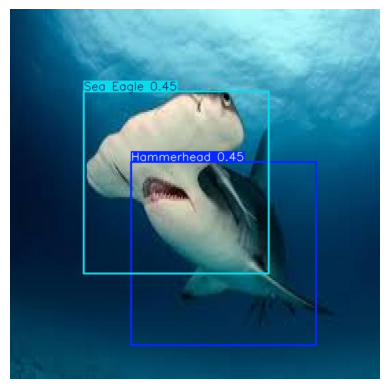

/content/runs/detect/train55/rthfd_jpg.rf.96d693bdafb704b91fc72dc801f96f9c.jpg


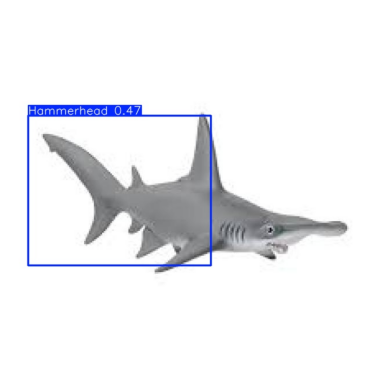

/content/runs/detect/train55/fdghd_jpg.rf.0edca47e58da830fdcfe44e6236e6910.jpg


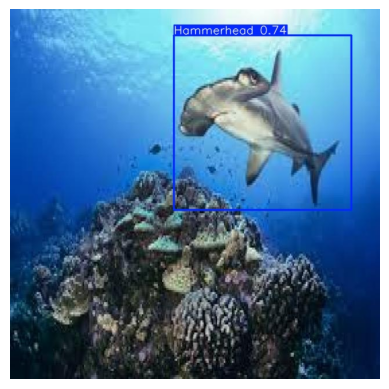

/content/runs/detect/train55/ryukr_jpg.rf.8082868e09c5a80c49c4012f19d92397.jpg


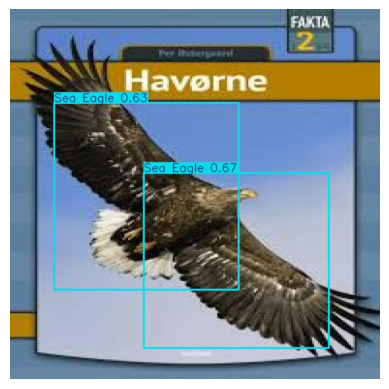

/content/runs/detect/train55/-m_m-_jpg.rf.e07678070bf39189d21096d4186c492e.jpg


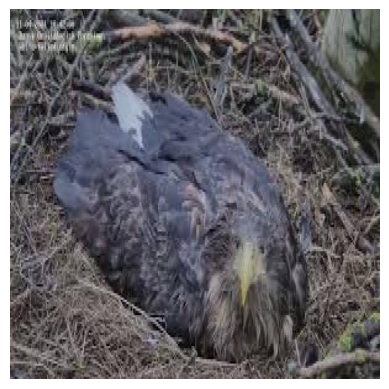

/content/runs/detect/train55/hammerhead-shark-10_jpg.rf.be821dce1f90740b3ef612ff67debdf2.jpg


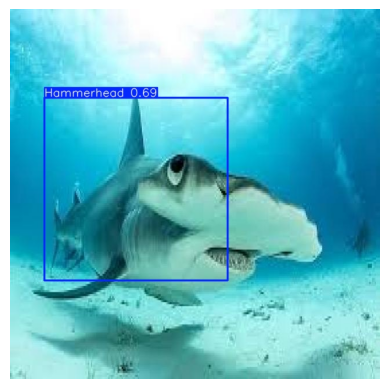

/content/runs/detect/train55/aelk_jpg.rf.dce374335ac0ebf5d6a979a4cda83b12.jpg


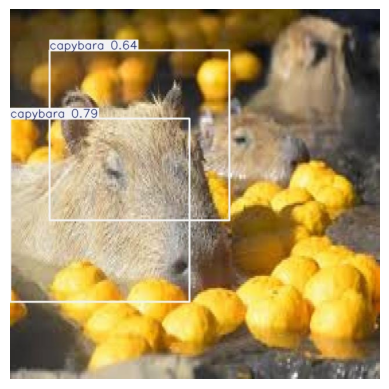

/content/runs/detect/train55/dfb_jpg.rf.6886c204fb535cdb42aad9d41163182b.jpg


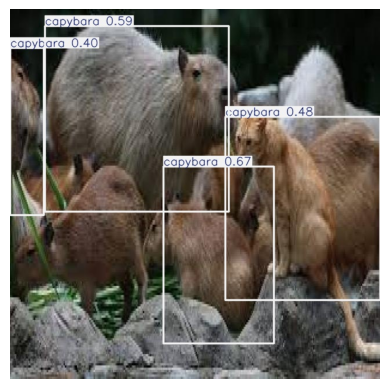

/content/runs/detect/train55/hammerhead-shark_5_jpg.rf.2003dbd2ddb01fff9f01244f2be6b360.jpg


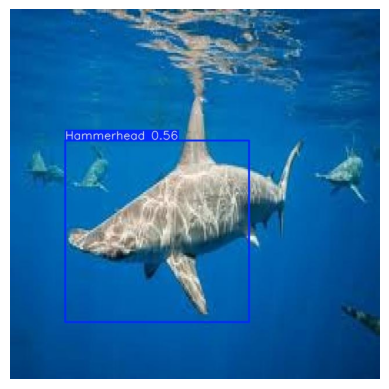

/content/runs/detect/train55/hammerhead-shark-14_jpg.rf.eac9a8d5b4e496effba41e5fc55fa8e9.jpg


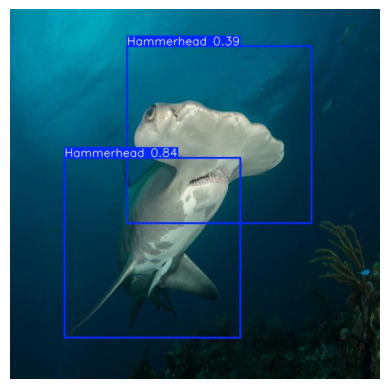

/content/runs/detect/train55/hammerhead-shark-12_jpg.rf.2a024fdecc74c6e9759d3d420d72e2b6.jpg


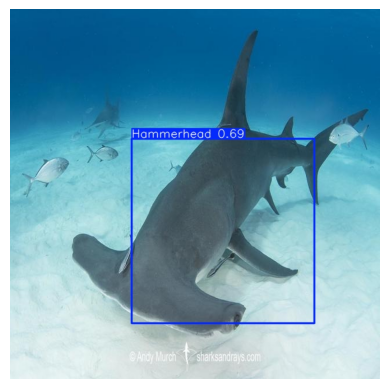

/content/runs/detect/train55/hammerhead-shark-9_jpg.rf.73be56e1be5988e8632d1152036ccc71.jpg


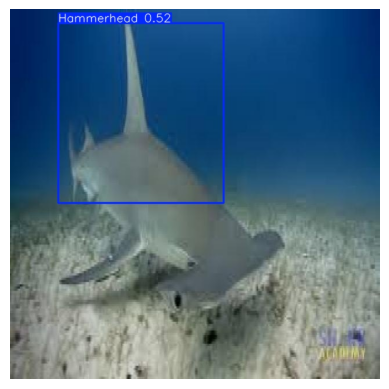

/content/runs/detect/train55/il_jpg.rf.da0c7f3a274a57f1ea15893479aaff29.jpg


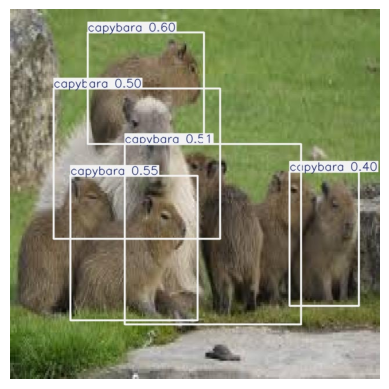

/content/runs/detect/train55/hammerhead-shark-13_jpg.rf.45f4a4c8f776046f953471a9b6da2357.jpg


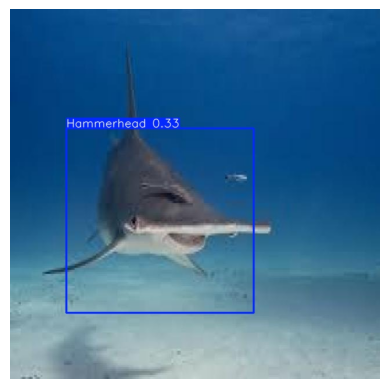

/content/runs/detect/train55/hammerhead-shark-11_jpg.rf.9e44ec9fe54652b81bce6d9caf48d3ea.jpg


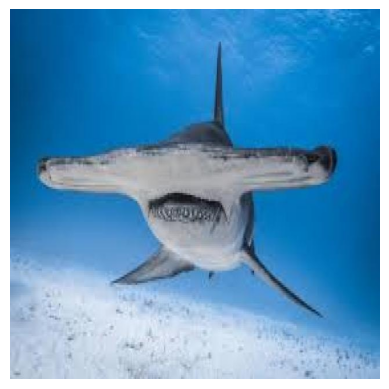

/content/runs/detect/train55/hammerhead-shark-7_jpg.rf.efb7d97403e5bcb4f200632a3eba6a0d.jpg


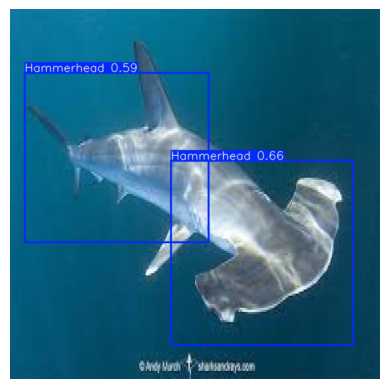

/content/runs/detect/train55/ytru_jpg.rf.fa8b29cd7d98e3c85733349d8a19a1a8.jpg


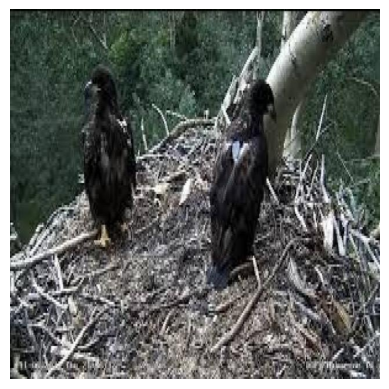

/content/runs/detect/train55/hkjlhm_jpg.rf.7b3f94d2eee2163bd2cd1cbc9099ec06.jpg


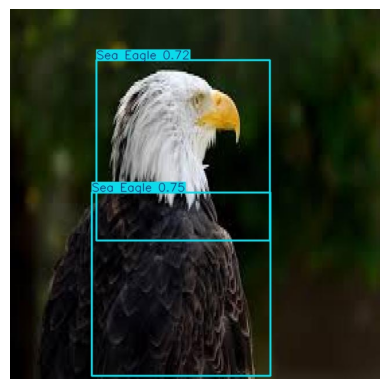

/content/runs/detect/train55/billede3_jpg.rf.d37ea1867bbd1ce8674ca28e42f76334.jpg


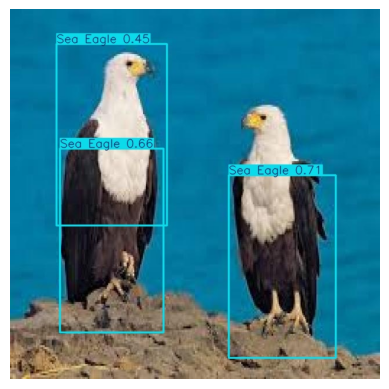

/content/runs/detect/train55/hammerhead-shark-8_jpg.rf.8fede6d2e2961b17562016dd4a50a184.jpg


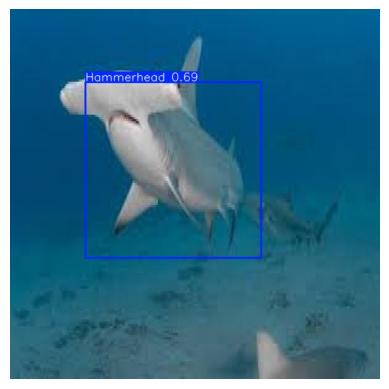

/content/runs/detect/train55/hammerhead-sharks_2_avif.rf.4a789b455d4f7472b637d4a49d94784f.jpg


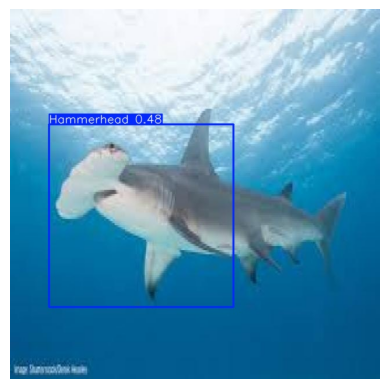

/content/runs/detect/train55/1_jpg.rf.0c6a5063fc2849d9e9782a42944ca981.jpg


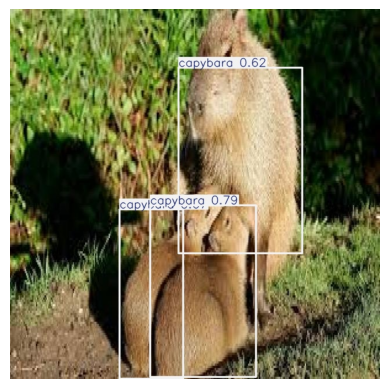

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
# Find all images
image_folder = "/content/runs/detect/train55"
image_paths = glob.glob(f"{image_folder}/*")

# Loop through images and show them
for image_path in image_paths:
    image = cv2.imread(image_path)

    # Convert BGR (OpenCV default) to RGB (for matplotlib)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_path)
    # Show the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis for cleaner display
    plt.show()